# Lab 2.2_2

## Ques 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/anantagarwal/Desktop/AI&ML Lab/Lab_2/headbrain.csv')

## Ques 2

In [6]:
XY = df.iloc[:, -2:]

## Ques 3

In [9]:
print("Statistical values of XY:")
print(XY.describe())

Statistical values of XY:
       Head Size(cm^3)  Brain Weight(grams)
count       237.000000           237.000000
mean       3633.991561          1282.873418
std         365.261422           120.340446
min        2720.000000           955.000000
25%        3389.000000          1207.000000
50%        3614.000000          1280.000000
75%        3876.000000          1350.000000
max        4747.000000          1635.000000


## Ques 4

In [17]:
X = XY.iloc[:, 0].values.reshape(-1, 1)  
Y = XY.iloc[:, 1].values.reshape(-1, 1)  
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: (237, 1)
Shape of Y: (237, 1)


## Ques 5

In [19]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)
print(f"Mean of X (Head Size): {mean_X}")
print(f"Mean of Y (Brain Weight): {mean_Y}")

Mean of X (Head Size): 3633.9915611814345
Mean of Y (Brain Weight): 1282.873417721519


## Ques 6

In [22]:
def linear_regression(X, Y):
    n = len(X)
    
    # Calculate the cross-deviation and deviation about X
    SS_xy = np.sum(Y * X) - n * mean_Y * mean_X
    SS_xx = np.sum(X * X) - n * mean_X * mean_X
    
    # Calculate regression coefficients
    b1 = SS_xy / SS_xx
    b0 = mean_Y - b1 * mean_X
    
    return b1, b0

In [24]:
b1, b0 = linear_regression(X, Y)

In [26]:
print(f"Coefficient (b1): {b1}")
print(f"Intercept (b0): {b0}")

Coefficient (b1): 0.2634293394894003
Intercept (b0): 325.57342104943916


In [28]:
Y_predicted = b0 + b1 * X

In [30]:
def root_mean_squared_error(Y, Y_predicted):
    return np.sqrt(np.mean((Y - Y_predicted) ** 2))

In [32]:
rmse = root_mean_squared_error(Y, Y_predicted)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 72.1206213783709


In [34]:
def r2_score(Y, Y_predicted):
    SS_total = np.sum((Y - mean_Y) ** 2)
    SS_residual = np.sum((Y - Y_predicted) ** 2)
    r2 = 1 - (SS_residual / SS_total)
    return r2

In [36]:
r2 = r2_score(Y, Y_predicted)
print(f"R2 Score: {r2}")

R2 Score: 0.6393117199570002


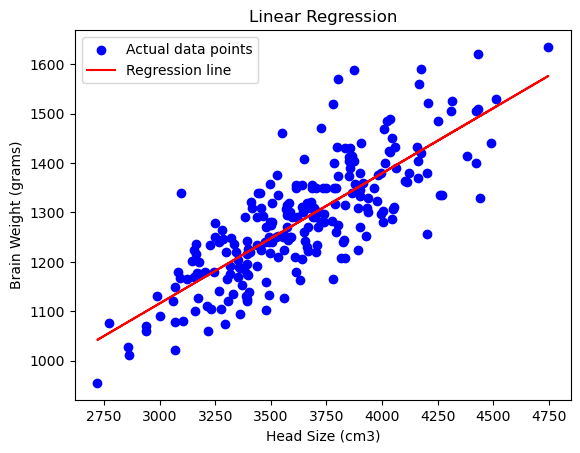

In [38]:
plt.scatter(X, Y, color='blue', label='Actual data points')
plt.plot(X, Y_predicted, color='red', label='Regression line')
plt.xlabel('Head Size (cm3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Linear Regression')
plt.legend()
plt.show()